# Peace and War genetic Algorithm
this is a personal project

<br/>

## pengenalan
ketika 2 individu ~soon atau lebih~ dengan resource mereka berevolusi agar bisa survive dengan 4 strategi aksi yaitu
* war
* peace
* grow
* move

apakah mendominasi atau bekerjasama atau saling apatis atau strategi lainnya yang dapat membuat mereka survive? mari kita simulasikan dengan algoritma genetika.

<br/>

---

## metodologi
### peta
dibuat peta lingkungan default 2x1

<br/>

| 1  | 2  |
| -- | -- |
| x  | x  |

<br/><br/>

### individu

dibuat 2 ~soon atau lebih~ individu (class) dengan attribute
* resource //value kekuatan individu
* intensity = 5 //jumlah intensitas kekuatan yang dikerahkan, default 0.
05
* position // posisi individu tersebut

### action
dibuat pula dengan 4 functions berikut
* war(individu opp)
* peace(individu opp)
* grow(individu opp)
* move(individu opp)

function war, trade, peace hanya bisa dilakukan saat satu lokasi dengan opponent, jika tidak dalam satu lokasi tidak terjadi apa-apa hanya mendapatkan score tetap. berikut

| action | self total add      | opp total add        | requirement |
| -------| ------------------- | -------------------- | ----------- |
| war    | +(opp\*a%+self\*a%) | -(opp\*a%+self\*2a%) | same spot   |
| peace  | -(self\*a%)         | +(self*a%)           | same spot   |
| grow   | +(self\*a%)         | +(opp\*0%)           | none        |
| move   | +(self\*0%)         | -(opp\*0%)           | none        |


<br/>

### treatment berbeda pada opponent kuat dan lemah

4 functions tadi dikombinasikan satu sama lain untuk menjadi fungsi yang memetakan perilaku terhadap opponent yang lebih kuat atau lebih lemah,

> actions[][] = action*action

| weaker\\stronger | war | peace | grow | move |
| ---------------- | --- | ----- | ---- | ---- |
| war              | 0,0 |  0,1  | 0,2  |  0,3 |
| peace            | 1,0 |  1,1  | 1,2  |  1,3 |
| grow             | 2,0 |  2,1  | 2,2  |  2,3 |
| move             | 3,0 |  3,1  | 3,2  |  3,3 |

> huruf representatif

| weaker\\stronger | war | peace | grow | move |
| ---------------- | --- | ----- | ---- | ---- |
| war              | *a* |  *b*  | *c*  |  *d* |
| peace            | *e* |  *f*  | *g*  |  *h* |
| grow             | *i* |  *j*  | *k*  |  *l* |
| move             | *m* |  *n*  | *o*  |  *p* |

contoh allel *h* merepresentasikan actions[1][3] adalah (peace,move), jika opponent dianggap lemah maka pelaku akan memilih act_stonger "peace" dan jika opponent dianggap kuat akan memilih act_weaker "move"  
<br/>

### Menetukan resource_ratio terhadap opponent
<br/>
\begin{align}
        \text{resource_ratio} = \left\{
        \begin{array}{cl}
        \frac{S_{\text{self}}}{S_{\text{opp}}} & S_{\text{self}} \le S_{\text{opp}} \\
        1 - \frac{S_{\text{opp}}}{S_{\text{self}}} & S_{\text{self}} > S_{\text{opp}}
        \end{array}
        \right.
    \end{align}
<br/>
contoh   

```
resource_self = 1
resource_opp = 5
resource_ratio1 = resource_self/resource_opp
resource_ratio1 -> 1/5

self = 5; opp = 1
resource_ratio2 = 1 - (resource_opp/resource_self)
resource_ratio2 -> 4/5
```
<br/>

### Menetukan action terhadap resource_ratio terhadap self_tact
<br/>
\begin{align}
        \text{action} = \left\{
        \begin{array}{cl}
        act\_weaker & resource\_ratio \le tact_{\text{self}} \\
        act\_stronger & resource\_ratio > tact_{\text{self}}
        \end{array}
        \right.
    \end{align}
<br/>
contoh menggunakan value resource ratio sebelumnya

```
resource_ratio1 -> 1/5
resource_ratio2 -> 4/5

tact_self = 0.4
allel = h
act_weaker = h[0]
act_weaker -> 'peace'
act_stronger = h[1]
act_stronger -> 'move'

if(resource_ratio < tact):
  self.peace(opp)
else:
  self.move(opp)

//resource_ratio1 < tact then: act_weaker
//resource_ratio2 >= tact then: act_stronger
```

<br/>

### Strategi
set strategi individu untuk dapat survive yaitu
* initiation
* reaction
* follow up reaction

#### initiation
individu dapat memilih fungsi a sampai p untuk action pertama ketika bertemu dengan opponent. Misal value *initiation* h, maka akan melakukan action peace (bebagi a% resource) ketika lawan dianggap lemah atau action move (berpindah posisi) ketika lawan dianggap kuat.
#### reaction
individu dapat memilih fungsi a sampai p untuk reaction dari *initiation* opponent. Misal opponent melakukan inisiasi war sedangkan value *reaction* self adalah *d*, maka ketika lawan dianggap lemah akan melakukan action war yaitu merebut resource sebesar (a%opp+a%self) dan ketika lawan dianggap kuat akan melakukan action move (berpindah posisi).
#### follow up reaction
individu dapat memilih fungsi a sampai p sebagai followup reaction sebagai lanjutan dari *initiation* opp dan *reaction* opp sebelumny. contoh apabila initiation opp adalah war dan opp memberikan reaction war lagi maka akan dibalas dari value *follow up reaction* self. *Follow up reaction* berbeda berdasarkan reaction opp sebelumnya sebagai berikut

| followup of war  |       |       |      |
| ---------------- | ----- | ----- | ---- |
| war              | peace | grow  | move |
| a~p              | a~p   | a~p   | a~p  |

| followup of peace|       |       |      |
| ---------------- | ----- | ----- | ---- |
| war              | peace | grow  | move |
| a~p              | a~p   | a~p   | a~p  |

| followup of grow |       |       |      |
| ---------------- | ----- | ----- | ---- |
| war              | peace | grow  | move |
| a~p              | a~p   | a~p   | a~p  |

| followup of move |       |       |      |
| ---------------- | ----- | ----- | ---- |
| war              | peace | grow  | move |
| a~p              | a~p   | a~p   | a~p  |

dilanjutkan dengan reaction untuk iterasi, jika sebelumnya saling beda posisi akan dimulai dari initiation lagi

<br/><br/>

---

### Encoding Kromosom
kromosom dibagi menjadi 4 segment dengan total 22 gen
* tact (float 0~1)
* initiation (functions[][] a~p)
* reaction 4*(functions[][] a~p)
* follow up reactions 4\*4*(functions[][] a~p)

kromosom backup akan aktif ketika gen sebelumnya tidak aktif, sebanyak 21
dengan ekspresi 'k','l','o','p' saja

# Game
membuat objek map dan individual
let's call it land and conqueror


## Setup


In [181]:
from collections import Counter
import re
import random
import matplotlib.pyplot as plt
import copy

### Land

In [182]:
class Land:
  """
  A map for the simulation.

  Params
  ------
  x : int
      The width of the map (number of columns).
  y : int
      The height of the map (number of rows).

  Returns
  ------
  None
  """

  def __init__(self, x=2, y=1):
    self.x = x  # Width of the land (columns)
    self.y = y  # Height of the land (rows)
    self.grid = [['.' for _ in range(x)] for _ in range(y)]  # Map representation (initially empty)

  def reset_grid(self):
    """Resets the grid to an empty state."""
    self.grid = [['.' for _ in range(self.x)] for _ in range(self.y)]

  def update_position(self, conquerors):
    """
    Updates the position of the conquerors on the map.

    Parameters
    ----------
    conquerors : list of Conqueror
      List of conquerors to place on the map.

    Returns
    -------
    None
    """
    self.reset_grid()  # Clear the map

    for idx, conqueror in enumerate(conquerors):
      x, y = conqueror.position
      self.grid[y][x] = str(idx + 1)  # Place conqueror by index (1, 2, ...)

  def display_map(self):
    """Prints out the current state of the map with conquerors' positions."""
    for row in self.grid:
      print(' '.join(row))

### Conqueror

In [183]:
class Conqueror:
  """
  Represents an individual conqueror in the game.

  Params
  ------
  position: array[int,int]
      The x, y coordinates on the map.
  resource: int
      Resource the conqueror holds.
  tact: float
      Tactic value affecting decisions.
  intensity: float
      Percentage of resources used in actions.
  initiation: char
      Initial action to take.
  reaction: array[char]
      Reactions to different actions (5 elements).
  follow_reaction: array[char]
      Follow-up reactions to specific actions (5x5 grid).

  Returns
  ------
  None
  """

  def __init__(self, resource=100, intensity=0.05, tact=0.5, initiation="a", reaction=["a","f","k","p"],
               follow_reaction=[["a","f","k","p"],["a","f","k","p"],["a","f","k","p"],["a","f","k","p"]],
               position=[0, 0]):
    self.position = position  # Coordinates [x, y]
    self.resource = resource  # Resource points
    self.intensity = intensity  # Action intensity
    self.tact = tact  # Tactic value
    self.initiation = initiation  # Initial action type
    self.reaction = reaction  # Reaction to actions
    self.follow_reaction = follow_reaction  # Follow-up reactions
    self.opp_history = []
    self.act_history = []

  def war(self, opp):
    """Steals resources from the opponent, increases self resources by a percentage.

    Parameters
    ----------
    opp : Conqueror
        The opponent to battle.

    Returns
    -------
    self, opp : Conqueror
        Updated conqueror and opponent resources after war.
    """
    self.resource += (self.resource * self.intensity + opp.resource * self.intensity)
    opp.resource -= (self.resource * self.intensity + opp.resource * self.intensity * 2)
    opp.opp_history.append(0)
    self.act_history.append(0)
    return self, opp

  def peace(self, opp):
    """Shares resources with the opponent.

    Parameters
    ----------
    opp : Conqueror
        The opponent to make peace with.

    Returns
    -------
    self, opp : Conqueror
        Updated resources after peace.
    """
    self.resource -= (self.resource * self.intensity)
    opp.resource += (self.resource * self.intensity)
    opp.opp_history.append(1)
    self.act_history.append(1)
    return self, opp

  def grow(self,opp):
    """Increases self resources by a percentage.

    Returns
    -------
    self : Conqueror
        Updated resource after growing.
    """

    self.resource += (self.resource * self.intensity)
    opp.opp_history.append(2)
    self.act_history.append(2)
    return self, opp

  def move(self, opp, land=Land()):
    """Moves the Conqueror on the map.

    Parameters
    ----------
    opp : Conqueror
        The opponent to consider when moving.
    land : Land
        The map where the conqueror moves.

    Returns
    -------
    self : Conqueror
        Updated position after moving.
    """
    # Get current position and bounds of the land
    x = self.position[0]
    y = self.position[1]
    max_x, max_y = land.x - 1, land.y - 1

    # If conqueror and opponent are in the same position, move them apart
    if self.position == opp.position:
      new_x = (x + 1) % (max_x + 1)  # Move to the next x-coordinate
      new_y = (y + 1) % (max_y + 1)  # Move to the next y-coordinate if needed
      self.position = [new_x, new_y]
    else:
      # Simple random move (can be improved with logic for directions, terrain, etc.)
      new_x = (x + 1) % (max_x + 1)  # Cycle within bounds of map
      new_y = y  # Or implement more complex movement logic
      self.position = [new_x, new_y]
    
    self.resource -= (self.resource * self.intensity)

    opp.opp_history.append(3)
    self.act_history.append(3)

    return self, opp

  def get_strength_ratio(self,opp):
    if self.resource <= opp.resource:
      return self.resource / opp.resource
    else:
      return 1 - (opp.resource / self.resource)

  def decode(self, action_char):
    """Decodes a single action character ('a'~'p') into a (weaker, stronger) tuple.

    Params
    ------
    action_char: str
        A single character representing an action ('a'~'p').

    Returns
    -------
    tuple[int, int]
        A tuple representing the (weaker, stronger) position in the action table.
    """
    # Mapping characters to their corresponding (weaker, stronger) positions
    action_map = {
        'a': (0, 0), 'b': (0, 1), 'c': (0, 2), 'd': (0, 3),
        'e': (1, 0), 'f': (1, 1), 'g': (1, 2), 'h': (1, 3),
        'i': (2, 0), 'j': (2, 1), 'k': (2, 2), 'l': (2, 3),
        'm': (3, 0), 'n': (3, 1), 'o': (3, 2), 'p': (3, 3)
    }

    # Check if the character is valid and return its corresponding tuple
    if action_char in action_map:
        return action_map[action_char]
    else:
        raise ValueError(f"Invalid action character: {action_char}")

  # stages are 0 = initiation; 1 reaction; 2 = followup_reaction
  def actions(self, opp, land=Land(), stage = 0):
    act = 0

    if self.tact >= self.get_strength_ratio(opp):
      act = 0
    else:
      act = 1

    if stage == 0:
      decoded_action = self.decode(self.initiation)
    elif stage == 1:
      decoded_action = self.decode(self.reaction[self.opp_history[-1]])
    elif stage == 2:
      #mengecek yang pertama yang opp lakukan sebelumnya, gen akan meresponnya berdasarkan ratio kekuatan musuh
      decoded_action = self.decode(self.follow_reaction[self.opp_history[-1]][self.opp_history[-2]])

    # Get the specific action based on the 'act' value (weaker/stronger)
    action_to_execute = decoded_action[act]

    if self.position != opp.position:
      self.act_history.append(action_to_execute)
      opp.opp_history.append(action_to_execute)

      return self, opp
    else:
      if action_to_execute == 0:
          return self.war(opp)
      elif action_to_execute == 1:
          return self.peace(opp)
      elif action_to_execute == 2:
          return self.grow(opp)
      elif action_to_execute == 3:
          return self.move(opp,land)


  def get_chromosome(self):
    """Get the chromosome-like stats of the Conqueror in a formatted and colored way.

    Returns
    -------
    chromosome: string
    """
    # Convert tact to an integer percentage (multiplied by 100)
    tact_str = f"{int(self.tact * 100)}"

    # Convert reaction and follow-up reaction lists to strings
    reaction_str = ''.join(self.reaction)
    follow_reaction_str = ''.join([r for follow in self.follow_reaction for r in follow])

    # # ANSI color codes for different colors
    # tact_color = '\033[93m'  # Yellow
    # initiation_color = '\033[91m'  # Red
    # reaction_color = '\033[94m'  # Blue
    # reset_color = '\033[0m'  # Reset to default

    tact_color = '\033[93m'  # Yellow
    initiation_color = '\033[92m'  # green
    reaction_color = '\033[34m'  # Blue
    reset_color = '\033[0m'  # Reset to default

    # Define a set of slightly different colors
    colors = [
        '\033[35;1m',  # Bright Magenta
        '\033[32;1m',  # Bright Green
        '\033[36;1m',  # Bright Cyan
        '\033[34;1m',  # Bright Blue
    ]

    # Prepare the colored follow_reaction_str
    colored_follow_reaction_str = ""
    for i in range(0, len(follow_reaction_str), 4):
        chunk = follow_reaction_str[i:i+4]  # Get 4 characters
        color = colors[(i // 4) % len(colors)]  # Select color based on chunk index
        colored_follow_reaction_str += f"{color}{chunk}{reset_color}"  # Add colored chunk

    # Concatenate the colored chromosome
    chromosome = (
        f"{tact_color}{tact_str}{reset_color}"
        f"{initiation_color}{self.initiation}{reset_color}"
        f"{reaction_color}{reaction_str}{reset_color}"
        f"{colored_follow_reaction_str}"
    )

    return chromosome


  def show_stats(self):
    """Displays the chromosome-like stats of the Conqueror in a formatted and colored way."""
    print("resource\t:", self.resource)
    print("position\t:", self.position)
    print("gen\t\t:",self.get_chromosome())



In [184]:
A = Conqueror()
B = Conqueror()
conquerors = [A,B]
land = Land()

In [185]:
land.display_map()

. .


In [186]:
land.update_position(conquerors)
land.display_map()

2 .


### game

In [187]:
# Randomized turn order function
def random_turn_order(A, B, turns = 10):
    random.seed(A.tact * B.tact * 10000)
    if random.choice([True, False]):
        A,B = A.actions(opp=B, stage=0)
        B,A = B.actions(opp=A, stage=0)
    else:
        B,A = B.actions(opp=A, stage=0)
        A,B = A.actions(opp=B, stage=0)

    for n in range(turns):
        for i in range(1,2) :
            random.seed(A.resource + B.resource)
            if random.choice([True, False]):
                A,B = A.actions(opp=B, stage=i)
                B,A = B.actions(opp=A, stage=i)
            else:
                B,A = B.actions(opp=A, stage=i)
                A,B = A.actions(opp=B, stage=i)
                
    return A,B


In [189]:
# Randomized turn order function
def harsh_turn_order(A, B, turns = 10):
    random.seed(A.tact * B.tact * 10000)
    if random.choice([True, False]):
        A,B = A.actions(opp=B, stage=0)
        B,A = B.actions(opp=A, stage=0)
    else:
        B,A = B.actions(opp=A, stage=0)
        A,B = A.actions(opp=B, stage=0)
    A.resource -= 2.01
    B.resource -= 2.01

    for n in range(turns):
        A.resource -= 2.01
        B.resource -= 2.01

        for i in range(1,2) :
            random.seed(A.resource + B.resource)
            if random.choice([True, False]):
                A,B = A.actions(opp=B, stage=i)
                B,A = B.actions(opp=A, stage=i)
            else:
                B,A = B.actions(opp=A, stage=i)
                A,B = A.actions(opp=B, stage=i)
                
    return A,B


In [188]:
# def population_turn(conquerors, turns = 10):
#     for conquer in conquerors:
#         for opp_conquer in conquerors
        

# Genetic Algorithm

## fitness function

In [190]:
def fitness(A):
    return A.resource

In [191]:
def fitness_domination(A,B):
    return A.resource - B.resource

## populating

In [192]:
def populate_population(size=10):
    """
    Initialize the population with random Conqueror instances.
    
    Params:
    -------
    size: int
        The size of the population.
    
    Returns:
    --------
    list[Conqueror]
        A list of randomly initialized Conqueror instances.
    """
    population = []
    for _ in range(size):
        # Randomly generate attributes for each Conqueror
        # resource = random.randint(50, 150)  # random initial resources
        # intensity = random.uniform(0.01, 0.1)  # random intensity between 0.01 and 0.1
        tact = random.uniform(0.01, 0.99)  # random tact between 0.01 and 0.99
        initiation = random.choice("abcdefghijklmnop")  # random initiation action
        reaction = [random.choice("abcdefghijklmnop") for _ in range(4)]  # random reaction actions
        follow_reaction = [[random.choice("abcdefghijklmnop") for _ in range(4)] for _ in range(4)]  # random follow-up actions
        
        # Create a new Conqueror and add it to the population
        conqueror = Conqueror(tact = tact, initiation=initiation, reaction=reaction, follow_reaction=follow_reaction)
        population.append(conqueror)
    
    return population


In [193]:
def populate_red(size=10):
    """
    Initialize the population with random Conqueror instances.
    
    Params:
    -------
    size: int
        The size of the population.
    
    Returns:
    --------
    list[Conqueror]
        A list of randomly initialized Conqueror instances.
    """
    population = []
    for _ in range(size):
        # Randomly generate attributes for each Conqueror
        # resource = random.randint(50, 150)  # random initial resources
        # intensity = random.uniform(0.01, 0.1)  # random intensity between 0.01 and 0.1
        tact = random.uniform(0.01, 0.99)  # random tact between 0.01 and 0.99
        initiation = random.choice("abcdefghijklmnop")  # random initiation action
        reaction = [random.choice("abcdefghijklmnop") for _ in range(4)]  # random reaction actions
        follow_reaction = [[random.choice("abcdefghijklmnop") for _ in range(4)] for _ in range(4)]  # random follow-up actions
        
        # Create a new Conqueror and add it to the population
        conqueror = Conqueror(tact = tact, initiation=initiation, reaction=reaction, follow_reaction=follow_reaction)
        population.append(conqueror)
    
    return population

## selection

In [194]:
def select_parents(population):
    """
    Select two parents from the population based on fitness.
    
    Params:
    -------
    population: list[Conqueror]
    
    Returns:
    --------
    Conqueror, Conqueror
        Two selected parents for crossover.
    """
    total_fitness = sum(conq.resource for conq in population)
    selection_probs = [conq.resource  / total_fitness for conq in population]
    
    # Select two parents based on fitness probabilities
    parents = random.choices(population, weights=selection_probs, k=4)
    # Ensure uniqueness
    parent1, parent2, parent3, parent4 = random.sample(parents, 4)
    
    return parent1, parent2, parent3, parent4



## crossover

In [195]:
def crossover(parent1, parent2):
    """
    Perform crossover between two Conquerors to produce an offspring.
    
    Params:
    -------
    parent1: Conqueror
    parent2: Conqueror
    
    Returns:
    --------
    Conqueror
        The offspring generated from the two parents.
    """
    # Example crossover logic (simple blend of attributes)
    # resource = (parent1.resource + parent2.resource) // 2
    # intensity = (parent1.intensity + parent2.intensity) / 2
    tact = (parent1.tact + parent2.tact) / 2.0
    
    # Combine initiation and reactions randomly
    initiation = random.choice([parent1.initiation, parent2.initiation])
    reaction = [random.choice([r1, r2]) for r1, r2 in zip(parent1.reaction, parent2.reaction)]
    follow_reaction = [
        [random.choice([fr1, fr2]) for fr1, fr2 in zip(follow1, follow2)]
        for follow1, follow2 in zip(parent1.follow_reaction, parent2.follow_reaction)
    ]
    
    return Conqueror(tact=tact, initiation=initiation, reaction=reaction, follow_reaction=follow_reaction)


## mutation

In [196]:
def mutate(conqueror, mutation_rate=0.1):
    """
    Mutate the given Conqueror with a certain probability.
    
    Params:
    -------
    conqueror: Conqueror
    mutation_rate: float
        The probability of mutation.
    
    Returns:
    --------
    Conqueror
        The mutated Conqueror.
    """
    random.seed(conqueror.tact)
    if random.random() < mutation_rate:
        # Mutate resource, intensity, or tact
        # conqueror.resource += random.randint(-10, 10)
        # conqueror.intensity += random.uniform(-0.01, 0.01)
        conqueror.tact += random.uniform(-0.05, 0.05)
        
        # Mutate initiation or reactions
        conqueror.initiation = random.choice("abcdefghijklmnop")
        conqueror.reaction = [random.choice("abcdefghijklmnop") for _ in range(4)]
        conqueror.follow_reaction = [[random.choice("abcdefghijklmnop") for _ in range(4)] for _ in range(4)]
    
    return conqueror


## Compiled GA

In [197]:
def genetic_algorithm(generations=100, population_size=10, turns=3, land=Land(), mutation_rate=0.1):
    best_eachgen = []
    best_fitness = []

    population = populate_population(population_size)
    
    for generation in range(generations):
        # Reset resource for each individual in the population to 100
        for individual in population:
            individual.resource = 100
            individual.opp_history = []
            individual.act_history = []

        for i in range(int(population_size/2)):
            population[i],population[-i] = harsh_turn_order(population[i],population[-i],turns=turns)
        
        # Evaluate fitness of the population
        population = sorted(population, key=fitness, reverse=True)
        print(f"Generation {generation}: Best fitness = {(population[0].resource):.3f} \t|| {(population[0].get_chromosome())}")
        best_fitness.append(population[0].resource)
        best_eachgen.append(copy.deepcopy(population[0]))

        # Select the top half of the population to breed
        new_population = populate_population(int(population_size/5))
        for i in range(int(population_size/5)):
            new_population.append(population[i])

        while len(new_population) < population_size:
            parent1, parent2, parent3, parent4 = select_parents(population)
            offspring1 = crossover(parent1, parent2)
            offspring1 = mutate(offspring1, mutation_rate)
            offspring2 = crossover(parent3, parent4)
            offspring2 = mutate(offspring2, mutation_rate)
            new_population.append(offspring1)
            new_population.append(offspring2)
        
        random.shuffle(new_population)
        population = new_population

    
    return best_eachgen, best_fitness


# Implementation

In [198]:
def plot_best_fit(generation_best_fits):
    """
    Plots the best fit values for each generation.

    Parameters
    ----------
    generation_best_fits : list[float]
        A list containing the best fit value for each generation.
    
    Returns
    -------
    None
    """
    plt.figure(figsize=(10, 5))
    plt.plot(generation_best_fits, marker='o', linestyle='-', color='b')
    
    plt.title('Best Fit Values Over Generations')
    plt.xlabel('Generation')
    plt.ylabel('Best Fit Value')
    plt.xticks(range(len(generation_best_fits)))  # Set x-ticks to correspond to generations
    plt.grid()
    plt.show()


In [199]:
top_eachgen, top_fitness = genetic_algorithm(generations=100, turns=2, population_size=50, mutation_rate=0.1)

Generation 0: Best fitness = 123.004 	|| 89kclfgmhjahfmknaicnail
Generation 1: Best fitness = 127.056 	|| 21ajkjbbldidfkaneickdok
Generation 2: Best fitness = 118.969 	|| 86kelaljhjiajpcnagmkobl
Generation 3: Best fitness = 132.509 	|| 50maajfddgckolllommleeg
Generation 4: Best fitness = 129.873 	|| 49kccoipnocpekmjedcnbpc
Generation 5: Best fitness = 131.887 	|| 55adadcchdahpceobhnjnmk
Generation 6: Best fitness = 127.056 	|| 55bilagbbeldpkajojfcjgk
Generation 7: Best fitness = 119.399 	|| 49kilampnhapakljilhokpc
Generation 8: Best fitness = 126.286 	|| 45iccommnolpebbjbccbbdc
Generation 9: Best fitness = 126.565 	|| 58emlakpnnaeekojikccfne
Generation 10: Best fitness = 127.468 	|| 33chmahdgolmnjgallalhgf
Generation 11: Best fitness = 118.901 	|| 72gfjacibdkgjkadocpjfpk
Generation 12: Best fitness = 126.430 	|| 72gfjacibdkgjkadocpjfpk


Generation 13: Best fitness = 108.102 	|| 54cigdganpmglenaeigbcgh
Generation 14: Best fitness = 127.253 	|| 36akaipjobalcklcclpmohp
Generation 15: Best fitness = 122.532 	|| 65oaimbebekeblebhdjiepg
Generation 16: Best fitness = 119.458 	|| 73mkkgifbeagpcbfnffjlca
Generation 17: Best fitness = 118.969 	|| 70oeimbebeofbmebodgieeh
Generation 18: Best fitness = 127.056 	|| 57cejonokpoflefpinbbaah
Generation 19: Best fitness = 127.245 	|| 64cejonokponllfbilbpkdl
Generation 20: Best fitness = 127.056 	|| 64cejonokponllfbilbpkdl
Generation 21: Best fitness = 126.535 	|| 41gpbhbinpapjkfhcebokgc
Generation 22: Best fitness = 126.910 	|| 36anbinigoalpepiooabegh
Generation 23: Best fitness = 113.555 	|| 61oebcclkdlkbfbpeloaebn
Generation 24: Best fitness = 123.161 	|| 35mcdojmjgghamboinddlbc
Generation 25: Best fitness = 129.668 	|| 31ehadcmpdjadgpbfmcojoc
Generation 26: Best fitness = 132.509 	|| 35anmdbhoblgghmcfjmjngj
Generation 27: Best fitness = 128.736 	|| 34ehadnmgdjapgpifmaoegc
Generation

# Coba cek

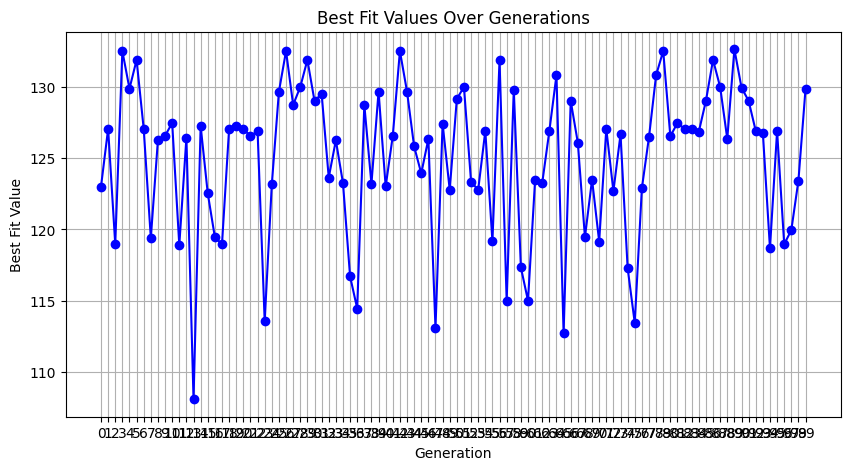

In [200]:
plot_best_fit(top_fitness)

In [201]:
def chromosome_with_differences(chromosome1, chromosome2):
    """
    Compare two chromosomes and return a new chromosome
    where matching elements remain the same, and differing
    elements are replaced with 'x'.

    Params:
    -------
    chromosome1: list or string
        The first chromosome (can be a list of elements or a string).
    chromosome2: list or string
        The second chromosome (can be a list of elements or a string).

    Returns:
    --------
    result: list or string
        The new chromosome with matching elements intact and differing elements as 'x'.
    """

    # Convert chromosome to a list if it's a string
    ansi_escape = re.compile(r'\x1B\[[0-?9;]*[mK]')  # Regex pattern to match ANSI escape sequences
    chromosome1 = ansi_escape.sub('', chromosome1)
    ansi_escape = re.compile(r'\x1B\[[0-?9;]*[mK]')  # Regex pattern to match ANSI escape sequences
    chromosome2 = ansi_escape.sub('', chromosome2)
    # Initialize an empty list to store the result
    result = []

    # Ensure both chromosomes are of the same length to compare
    min_length = min(len(chromosome1), len(chromosome2))

    # Loop through both chromosomes and check for matching elements
    for i in range(min_length):
        if chromosome1[i] == chromosome2[i]:
            result.append(chromosome1[i])  # Keep the matching element
        else:
            result.append('x')  # Replace with 'x' for differing elements

    # Return the result in the same format as the input
    return ''.join(result) if isinstance(chromosome1, str) else result


In [202]:
def count_allele_expressions(chromosome):
    """
    Count the expression of each allele in the chromosome.

    Params:
    -------
    chromosome: list or string
        The chromosome for which to count allele expressions.

    Returns:
    --------
    dict
        A dictionary with alleles as keys and their counts as values.
    """
    # Convert chromosome to a list if it's a string
    ansi_escape = re.compile(r'\x1B\[[0-?9;]*[mK]')  # Regex pattern to match ANSI escape sequences
    chromosome = ansi_escape.sub('', chromosome)

    if isinstance(chromosome, str):
        chromosome = list(chromosome)
    
    # Count the occurrences of each allele
    allele_count = Counter(chromosome)

    return dict(allele_count)  # Convert Counter to a regular dictionary for better readability


In [203]:
# Example usage:
print(top_eachgen[13].get_chromosome())
allele_counts = count_allele_expressions(top_eachgen[13].get_chromosome())
print(allele_counts)  # Output: {'a': 2, 'b': 2, 'c': 2, 'd': 1, 'e': 1}

54cigdganpmglenaeigbcgh
{'5': 1, '4': 1, 'c': 2, 'i': 2, 'g': 5, 'd': 1, 'a': 2, 'n': 2, 'p': 1, 'm': 1, 'l': 1, 'e': 2, 'b': 1, 'h': 1}


In [204]:
print(chromosome_with_differences(top_eachgen[13].get_chromosome(), top_eachgen[2].get_chromosome())) 

xxxxxxxxxxxxxxxxxxxxxxx


In [205]:
def actions_check(top_eachgen, gen = 0):
    print(fitness(top_eachgen[gen]))
    for i, act in enumerate(top_eachgen[gen].opp_history):
        print("action: ",top_eachgen[gen].act_history[i]," opponent act: ", act)

In [206]:
top_fitness[0]

123.00444999999999

In [207]:
sorted_gen = sorted(top_eachgen, key=fitness, reverse=True)

In [217]:
actions_check(sorted_gen, gen=99)

108.10151446593748
action:  2  opponent act:  2
action:  1  opponent act:  1
action:  2  opponent act:  1
